In [3]:
import pandas as pd

#데이터 경로
data_path = 'data3/'

#데이터 로드
sales_train = pd.read_csv(data_path + 'sales_train.csv')
shops = pd.read_csv(data_path + 'shops.csv')
items = pd.read_csv(data_path + 'items.csv')
item_categories = pd.read_csv(data_path + 'item_categories.csv')
test = pd.read_csv(data_path + 'test.csv')
sample_submission = pd.read_csv(data_path + 'sample_submission.csv')


# #데이터 확인
# print(sales_train.head())
# print(item_categories.head())
# print(items.head())
# print(shops.head())
# print(test.head())

In [4]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


1. 분석결과 월별 판매량만 구하면 되니 date 피처는 제거
2. 타깃값= date_block_num 피쳐값이 같은 데이터들의 item_cnt_day 피처값들의 합을 구하면 됨


In [7]:
sales_train.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   date            2935849 non-null  object 
 1   date_block_num  2935849 non-null  int64  
 2   shop_id         2935849 non-null  int64  
 3   item_id         2935849 non-null  int64  
 4   item_price      2935849 non-null  float64
 5   item_cnt_day    2935849 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


1. 메모리사용량이 많으니 관리가 필요함
2. 시계열데이터는 시간흐름이 중요함 
3. 훈련데이터중 가장 최근인 2015년 10월 판매내역을 검증데이터로 사용


In [8]:
# 샵데이터 확인
print(shops.head())


                        shop_name  shop_id
0   !Якутск Орджоникидзе, 56 фран        0
1   !Якутск ТЦ "Центральный" фран        1
2                Адыгея ТЦ "Мега"        2
3  Балашиха ТРК "Октябрь-Киномир"        3
4        Волжский ТЦ "Волга Молл"        4


1. 상점이름의 첫 단어는 도시를 뜻 함
2. 추후 shop_name 에서 도시 정보를 추출하여 새로운 피처로 추가
3. shop데이터의 shop_id 피처는 sales_train 에도 존재 하므로 두 데이터를 병합하여 사용


In [10]:
shops.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


item데이터 살펴보기

In [12]:
items.head()


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


1. 분석결과 상품명 피쳐 제거
2. item_id 피처는 sales_train 에도 존재 하므로 두 데이터를 병합하여 사용

In [15]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


item_categories의 데이터를 살펴보기

In [16]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


# 분석결과
1. 상품분류명과 상품분류 id 로 구성돼 있음
2. item_category_id 를 기준을 sales_train과 items_cartegories를 병합

In [17]:
item_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [18]:
train = sales_train.merge(shops, on='shop_id', how='left')
train = train.merge(items, on='item_id', how='left')
train = train.merge(item_categories, on='item_category_id', how='left')

train.head()



,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
0,02.01.2013,0,59,22154,999.00,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,03.01.2013,0,25,2552,899.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
2,05.01.2013,0,25,2552,899.00,-1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
3,06.01.2013,0,25,2554,1709.05,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил
4,15.01.2013,0,25,2555,1099.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства


# 분석결과
1. 훈련데이터에 상점, 상품, 상품분류 정보가 추가됨
2. train을 활용해 피쳐 요약표를 만들어보기


In [22]:
def resumetable(df):
    print(f'데이터셋 형상: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index':'피처'})
    summary['결측값'] = df.isnull().sum().values
    summary['고유값'] = df.nunique().values
    summary['첫 번째 값'] = df.loc[0].values
    summary['두 번째 값'] = df.loc[1].values
    return summary

resumetable(train)



데이터셋 형상: (2935849, 10)


,피처,데이터타입,결측값,고유값,첫 번째 값,두 번째 값
0,date,object,0,1034,02.01.2013,03.01.2013
1,date_block_num,int64,0,34,0,0
2,shop_id,int64,0,60,59,25
3,item_id,int64,0,21807,22154,2552
4,item_price,float64,0,19993,999.0,899.0
5,item_cnt_day,float64,0,198,1.0,1.0
6,shop_name,object,0,60,"Ярославль ТЦ ""Альтаир""","Москва ТРК ""Атриум"""
7,item_name,object,0,21807,ЯВЛЕНИЕ 2012 (BD),DEEP PURPLE The House Of Blue Light LP
8,item_category_id,int64,0,84,37,58
9,item_category_name,object,0,84,Кино - Blu-Ray,Музыка - Винил


# 분석결과
1. 상점ID, 상품ID, 상품분류IDA는 각각 상점명, 상품명, 상품분류명과 1:1로 매칭되므로 둘중 하나제거
2. 피쳐요약표는 info()함수로도 살펴볼 때 미처 파악하지 못 한 정보를 얻을 수 있다. 번거롭더라도 피쳐요약표를 만드는 습관을 들이자.


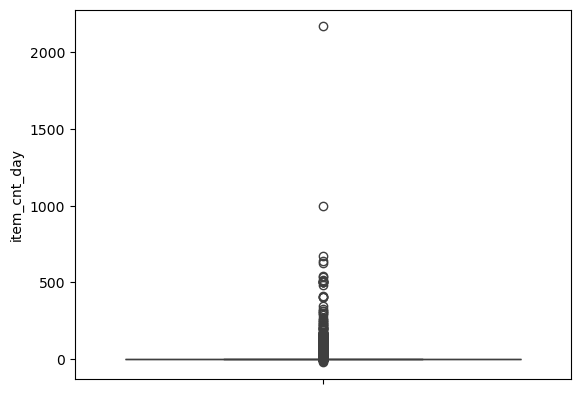

In [36]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
sns.boxplot(y='item_cnt_day', data=train)
plt.show()



# 분석결과
1. 데이터의 이상치가 많음 
2. 이상치를 제거하는 것이 중요함
3. 일별 판매량에서 1,000개이상 데이터 (이상치) 제거 예정


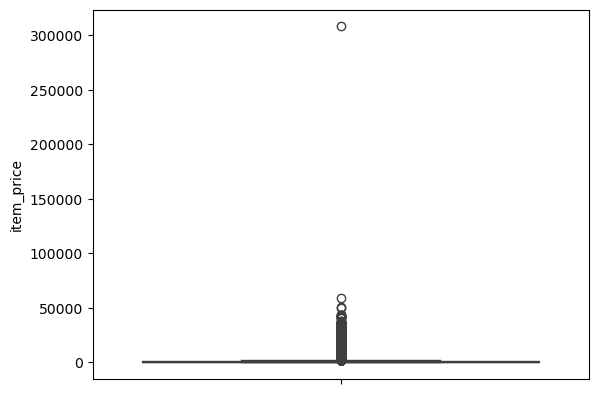

In [28]:
sns.boxplot(y='item_price', data=train)
plt.show()


# 분석결과
1. 판매가에서 50,000이상의 데이터 (이상치) 제거 예정)

In [33]:
group = train.groupby('date_block_num').agg({'item_cnt_day':'sum'})
group.reset_index() # 인덱스 재설정



,date_block_num,item_cnt_day
0,0,131479.0
1,1,128090.0
2,2,147142.0
3,3,107190.0
4,4,106970.0
5,5,125381.0
6,6,116966.0
7,7,125291.0
8,8,133332.0
9,9,127541.0


# 분석결과
1. reset_index() 함수를 사용해 인덱스를 재설정
2. 호출 하지않으면 그룹화한 date_block_num 피처가 인덱스로 설정됨
3. 그래프를 그릴 때 date_block_num 피처를 사용해야해서 새로운 인덱스를 생성
4. 2013년 1월 ~ 2015년 10월까지 월별 판매량이 합산됨

/var/folders/48/xzymtx_s4_jdfwkb7jpklzzw0000gn/T/ipykernel_47573/857945838.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='date_block_num', y='item_cnt_day', data=group_month_sum, palette='tab20')


[Text(0.5, 1.0, 'Distribution of monthly item couts by date block number'),
 Text(0.5, 0, 'Date block number'),
 Text(0, 0.5, 'Monthly item count')]

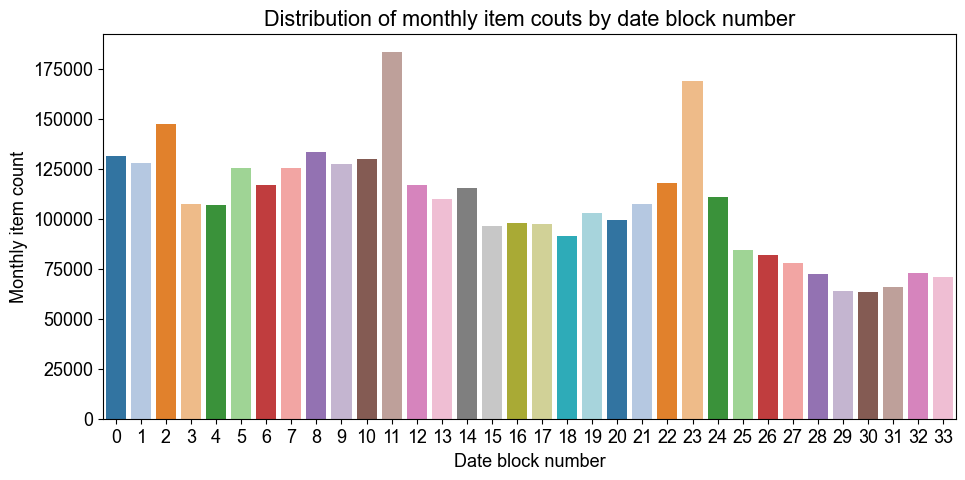

In [50]:
mpl.rc('font', family='Arial', size=13)
figure, ax = plt.subplots()
figure.set_size_inches(11, 5)

# 월별 총 상품 판매량 
group_month_sum = train.groupby('date_block_num').agg({'item_cnt_day':'sum'})
group_month_sum = group_month_sum.reset_index()

# 일별 총 상품 판매량 막대 그래프
sns.barplot(x='date_block_num', y='item_cnt_day', data=group_month_sum, palette='tab20')
# 그래프 제목, x축 라벨, y축 라벨명 설정
ax.set(title='Distribution of monthly item couts by date block number', 
       xlabel='Date block number', ylabel='Monthly item count')

# 분석결과
12월 연말이라 판매량이 급증함


# 상품분류별 판매량 시각화

In [51]:
train['item_category_id'].nunique()



84

84개는 너무 많으니 10,000개의 판매량 초과하는 상품분류만 추출 해서 시각화

/var/folders/48/xzymtx_s4_jdfwkb7jpklzzw0000gn/T/ipykernel_47573/2767859511.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='item_category_id', y='item_cnt_day', data=group_cat_sum, palette='tab20')


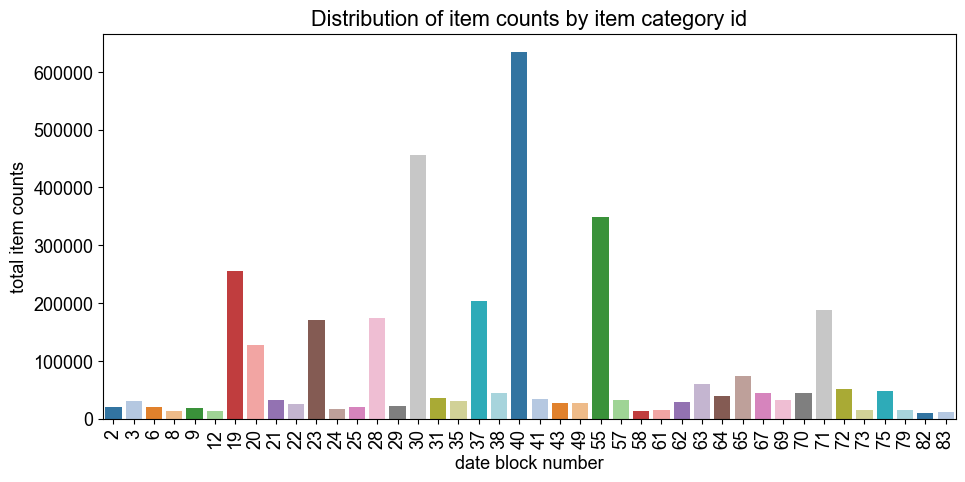

In [56]:
figure, ax = plt.subplots()
figure.set_size_inches(11, 5)

# 상품분류별 총 상품 판매량 
group_cat_sum = train.groupby('item_category_id').agg({'item_cnt_day':'sum'})
group_cat_sum = group_cat_sum.reset_index()

# 판매량 10,000개 이상인 상품분류 추출
group_cat_sum = group_cat_sum[group_cat_sum['item_cnt_day'] >= 10000]

# 상품분류별 총 상품 판매량 막대그래프
sns.barplot(x='item_category_id', y='item_cnt_day', data=group_cat_sum, palette='tab20')
ax.set(title='Distribution of item counts by item category id', 
       xlabel='date block number', ylabel='total item counts')

ax.tick_params(axis='x', rotation=90)
plt.show()


# 분석결과
1. 1등 20번 2등 30번 3등 5번 순으로 가장 많이 팔림


# 상점별 판매량 시각화

/var/folders/48/xzymtx_s4_jdfwkb7jpklzzw0000gn/T/ipykernel_47573/4064791367.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='shop_id', y='item_cnt_day', data=group_shop_sum, palette='tab20')


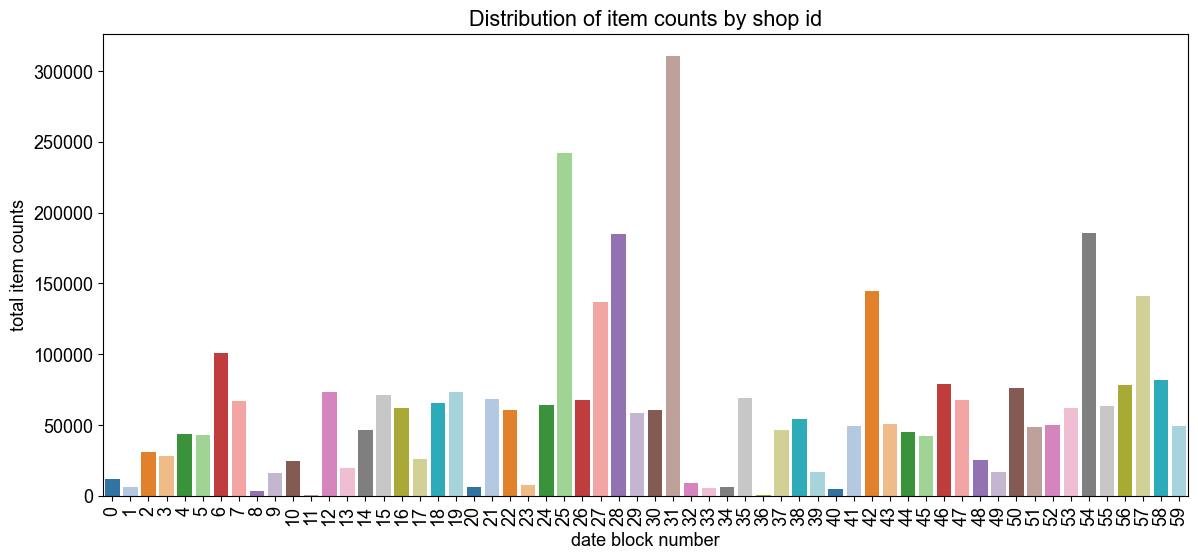

In [62]:
figure, ax = plt.subplots()
figure.set_size_inches(14, 6
                       )

# 상점별 총 상품 판매량
group_shop_sum = train.groupby('shop_id').agg({'item_cnt_day':'sum'})
group_shop_sum = group_shop_sum.reset_index()

# 상점별 총 상품 판매량 막대그래프
sns.barplot(x='shop_id', y='item_cnt_day', data=group_shop_sum, palette='tab20')
ax.set(title='Distribution of item counts by shop id', 
       xlabel='date block number', ylabel='total item counts')
ax.tick_params(axis='x', rotation=90)
plt.show()

# 분석결과 
1. 31번 상점이 가장 많이 팔림
2. 25번 상점이 2등
3. 54번 상점이 3등


# 머신러닝 모델 훈련을 위한 데이터 준비


# sales_tain 피쳐명 한글화

In [91]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings(action='ignore') # 경고 문구 생략 1) LightBGM으로 범주형데이터를 모델링하면, 
                                                            # 지장은 없지만 불필요한 경고문구 발생하므로 생략함

# 데이터 경로
data_path = 'data3/'

# 데이터 로드
sales_train = pd.read_csv(data_path + 'sales_train.csv')
shops = pd.read_csv(data_path + 'shops.csv')
items = pd.read_csv(data_path + 'items.csv')
item_categories = pd.read_csv(data_path + 'item_categories.csv')
test = pd.read_csv(data_path + 'test.csv')
sample_submission = pd.read_csv(data_path + 'sample_submission.csv')





# sales_train 피쳐 한글화

In [92]:
sales_train = sales_train.rename(columns={'date' : '날짜',
                                          'date_block_num' : '월ID',
                                          'shop_id' : '상점ID',
                                          'item_id' : '상품ID',
                                          'item_price' : '판매가',
                                          'item_cnt_day' : '판매량'})
sales_train.head()


,날짜,월ID,상점ID,상품ID,판매가,판매량
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


# shops 피쳐명 한글화

In [93]:
shops = shops.rename(columns={'shop_name' : '상점명',
                                'shop_id' : '상점ID'})
shops.head()


,상점명,상점ID
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


# items 한글화

In [94]:
items = items.rename(columns={'item_name' : '상품명',
                                'item_id' : '상품ID',
                                'item_category_id' : '상품분류ID'})
items.head()

,상품명,상품ID,상품분류ID
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


# item_categories 한글화

In [95]:
item_categories = item_categories.rename(columns={'item_category_name' : '상품분류명',
                                                    'item_category_id' : '상품분류ID'})
item_categories.head()



,상품분류명,상품분류ID
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


# test 피쳐명 한글화

In [97]:
test = test.rename(columns={'shop_id' : '상점ID',
                            'item_id' : '상품ID'})
test.head()



,ID,상점ID,상품ID
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


# 데이터 다운 캐스팅 
1. 정수형은 int64 
2. 실수형은 float64
3. 범주형은 object
4. pandas에 downcast() 함수를 사용항 해당피처 크기에 맞게 적절한 데이터타입으로 변환 함수 사용 예정

In [98]:
def downcast(df, verbose=True):
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        dtype_name = df[col].dtype.name
        if dtype_name == 'object':
            pass
        elif dtype_name == 'bool':
            df[col] = df[col].astype('int8')
        elif dtype_name.startswith('int') or (df[col].round() == df[col]).all():
            df[col] = pd.to_numeric(df[col], downcast='integer')
        else:
            df[col] = pd.to_numeric(df[col], downcast='float')
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose:
        print('{:.1f}% 압축됨' .format(100 * (start_mem - end_mem) / start_mem))
    return df




# # 다운캐스트 함수 ↑

In [99]:
all_df = [sales_train, shops, items, item_categories, test]
for df in all_df:
    downcast(df)



54.2% 압축됨
38.6% 압축됨
54.2% 압축됨
39.9% 압축됨
70.8% 압축됨


In [100]:
test.head()

,ID,상점ID,상품ID
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


# 월ID, 상점ID, 상품ID 조합을 만듦

In [101]:
from itertools import product
# train 리스트 초기화
train = []

# 월ID, 상점ID, 상품ID 조합 생성
for i in sales_train['월ID'].unique():
    all_shops = sales_train[sales_train['월ID'] == i]['상점ID'].unique()
    all_items = sales_train[sales_train['월ID'] == i]['상품ID'].unique()
    train.append(np.array(list(product([i], all_shops, all_items))))

idx_features = ['월ID', '상점ID', '상품ID'] # 기준 피처
# 리스트 타입인 train을 DataFrame 타입으로 변환
train = pd.DataFrame(np.vstack(train), columns=idx_features)

train

,월ID,상점ID,상품ID
0,0,59,22154
1,0,59,2552
2,0,59,2554
3,0,59,2555
4,0,59,2564
...,...,...,...
10913845,33,21,7635
10913846,33,21,7638
10913847,33,21,7640
10913848,33,21,7632


# ↑ 월ID, 상점ID, 상품ID 피처 조합 생성 코드

# 지금 까지 만든 train 데이터프레임에 다른 데이터들도 추가예정
1. 타깃값인 각 상점의 상품별 월간 판매량

In [103]:
# idx_features 기준으로 그룹화해서 판매량 합 구하기
group = sales_train.groupby(idx_features).agg({'판매량':'sum'})
# 인덱스 재성정
group = group.reset_index()
# 피처명을 '일별 판매량'에서 '월간 판매량'으로 변경
group.rename(columns={'일별판매량':'월간 판매량'})

group




,월ID,상점ID,상품ID,판매량
0,0,0,32,6
1,0,0,33,3
2,0,0,35,1
3,0,0,43,1
4,0,0,51,2
...,...,...,...,...
1609119,33,59,22087,6
1609120,33,59,22088,2
1609121,33,59,22091,1
1609122,33,59,22100,1


# 각 상점의 상품별 '월간 판매량'을 구햇으니 피처명 '판매량'도 '월간판매량'으로 변경


In [104]:
# train 과 group 데이터프레임을 병합
train = train.merge(group, on=idx_features, how='left')
train

,월ID,상점ID,상품ID,판매량
0,0,59,22154,1.0
1,0,59,2552,NaN
2,0,59,2554,NaN
3,0,59,2555,NaN
4,0,59,2564,NaN
...,...,...,...,...
10913845,33,21,7635,NaN
10913846,33,21,7638,NaN
10913847,33,21,7640,NaN
10913848,33,21,7632,NaN


# 기존에 없던 데이터 조합을 만들어서 '0'값이 NaN으로 채워짐 추후 0값으로 대체 해야함

In [105]:
# 가비지 컬렉션을 실행하여 더 이상 사용 하지않는 group 데이터를 수거
# 많은 피쳐를 생성하면 메모리 초과로 코드가 실행중단 됨
import gc # 가비지 컬렉터 부르기

del group # 더는 사용하지 않는 변수 지정
gc.collect(); # 가비지 컬렉션 수행

` # 현재상황 `
1. 지금까지 월ID, 상점ID, 상품ID 피처 조합으로 train 데이터프레임을 만들었으니 여기에 각 상점의 상품별 월간 판매량(타깃값)을 추가함
2. train에 test 데이터도 추가

# 이어붙이기(위아래로 붙이는 것을 표현) 
1. test에 월ID에 피처를 추가해야함 
2. 월ID 는 2013/1 은 0 , 33은 2015/10 임
3. 테스트 데이터는 2015년 11월 판매기로이므로 34로 설정


In [108]:
test['월ID'] = 34
test

,ID,상점ID,상품ID,월ID
0,0,5,5037,34
1,1,5,5320,34
2,2,5,5233,34
3,3,5,5232,34
4,4,5,5268,34
...,...,...,...,...
214195,214195,45,18454,34
214196,214196,45,16188,34
214197,214197,45,15757,34
214198,214198,45,19648,34


In [110]:
# train 과 test 데이터프레임을 이어붙이기
all_data = pd.concat([train, test.drop('ID', axis=1)], ignore_index=True, # 기존 인덱스 무시 (0부터 새로 시작)
keys=idx_features)

all_data

,월ID,상점ID,상품ID,판매량
0,0,59,22154,1.0
1,0,59,2552,NaN
2,0,59,2554,NaN
3,0,59,2555,NaN
4,0,59,2564,NaN
...,...,...,...,...
11128045,34,45,18454,NaN
11128046,34,45,16188,NaN
11128047,34,45,15757,NaN
11128048,34,45,19648,NaN


# 결과
1. 테스트 데이터가 추가되었고 월ID 피처가 추가되었음
2. 결측값이 많음 결측값을 o으로 대체 하겟음

In [111]:
# 결측값을 0으로 대체
all_data = all_data.fillna(0)

all_data

,월ID,상점ID,상품ID,판매량
0,0,59,22154,1.0
1,0,59,2552,0.0
2,0,59,2554,0.0
3,0,59,2555,0.0
4,0,59,2564,0.0
...,...,...,...,...
11128045,34,45,18454,0.0
11128046,34,45,16188,0.0
11128047,34,45,15757,0.0
11128048,34,45,19648,0.0


# 나머지 데이터도 병합
1. shops, items, item_categories 데이터프레임을 병합
2. all_data 에 추가
3. 가비지 컬렉션도 동시에 진행


In [114]:
# 나머지 데이터 병합
all_data = all_data.merge(shops, on='상점ID', how='left')
all_data = all_data.merge(items, on='상품ID', how='left')
all_data = all_data.merge(item_categories, on='상품분류ID', how='left')

# 데이터 다운 캐스팅
all_data = downcast(all_data)

# 가비지 컬렉션 수행
del shops, items, item_categories # 더는 사용하지 않는 변수 지정
gc.collect(); # 가비지 컬렉션 수행




NameError: name 'shops' is not defined

In [117]:
all_data.head()

,월ID,상점ID,상품ID,판매량,상점명,상품명,상품분류ID,상품분류명
0,0,59,22154,1,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,0,59,2552,0,"Ярославль ТЦ ""Альтаир""",DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
2,0,59,2554,0,"Ярославль ТЦ ""Альтаир""",DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил
3,0,59,2555,0,"Ярославль ТЦ ""Альтаир""",DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства
4,0,59,2564,0,"Ярославль ТЦ ""Альтаир""",DEEP PURPLE Perihelion: Live In Concert DVD (К...,59,Музыка - Музыкальное видео


# 현재상황
1. 데이터 병합 완료
2. all_data 에서 상점명, 상품명, 상품분류명 피처는 모두 러시아어 입니다.
3. 문자데이터이기도 하고 상점ID, 상품ID, 상품분류ID 와 일대일 매칭되므로 제거해도 가능한 피쳐임
4. 따라서 이 피처들을 제거하고 모델링 해보겠음


In [118]:
all_data = all_data.drop(['상점명', '상품명', '상품분류명'], axis=1)

In [119]:

all_data.head()



,월ID,상점ID,상품ID,판매량,상품분류ID
0,0,59,22154,1,37
1,0,59,2552,0,58
2,0,59,2554,0,58
3,0,59,2555,0,56
4,0,59,2564,0,59


# 현재상황
1. 훈련데이터: 2013년 1월 ~ 2015년 9월까지 (월ID=32)까지 판매내역
2. 검증데이터: 2015년 10월(월ID=33) 판매내역
3. 테스트데이터: 2015년 11월(월ID=34) 판매내역


In [123]:
#훈련데이터 (피처)
X_train = all_data[all_data['월ID'] < 33]
X_train = X_train.drop(['판매량'], axis=1)

#검증 데이터 (피처)
X_valid = all_data[all_data['월ID'] == 33]
X_valid = X_valid.drop(['판매량'], axis=1)

#테스트 데이터 (피처)
X_test = all_data[all_data['월ID'] == 34]
X_test = X_test.drop(['판매량'], axis=1)


# 훈련데이터 (타깃값)
y_train = all_data[all_data['월ID'] < 33]['판매량']
y_train = y_train.clip(0, 20) # 타깃값 범위 제한

# 검증데이터 (타깃값)
y_valid = all_data[all_data['월ID'] == 33]['판매량']
y_valid = y_valid.clip(0, 20) # 타깃값 범위 제한


# 훈련 검증 테스트 데이터를 할당 했으니 all_data는 없어도 됨 잊지말고 가비지 컬렉션 수행




In [124]:
del all_data
gc.collect();


In [ ]:
# import lightgbm as lgb

# #LightGBM 용 하이퍼 파라미터
# params = {'metric' : 'rmse', #평가지표 = rmse
#           'num_leaves' : 255, # 트리 수
#           'learning_rate' : 0.01, # 학습률
#           'force_col_wise' : True, # 열 방향 계산
#           'random_state' : 10 # 랜덤 시드 설정
#           }

# # 범주형 피쳐 설정 
# cat_features = ['상점ID','상품분류ID']

# # LightGBM용 훈련 및 검증 데이터셋
# dtrain = lgb.Dataset(X_train, y_train)
# dvalid = lgb.Dataset(X_valid, y_valid)

# # LightGBM 모델 생성
# # LightGBM 모델을 생성하고, 훈련 데이터셋과 검증 데이터셋을 사용하여 모델을 훈련합니다.
# # 모델은 500번의 부스팅 라운드를 수행하고, 범주형 피쳐를 사용합니다.
# # 훈련 과정에서는 매 50번째 라운드마다 상세한 정보를 출력합니다.
# model = lgb.train(params=params, 
#                   train_set=dtrain, 
#                   num_boost_round=500, 
#                   valid_sets=[dtrain, dvalid],
#                   categorical_feature=cat_features,
#                   verbose_eval=50)




In [134]:
import lightgbm as lgb

# LightGBM 용 하이퍼 파라미터
params = {
    'metric': 'rmse',           # 평가지표 = rmse
    'num_leaves': 255,          # 트리 수
    'learning_rate': 0.01,      # 학습률
    'force_col_wise': True,     # 열 방향 계산
    'random_state': 10          # 랜덤 시드 설정
}

# 범주형 피처 설정
cat_features = ['상점ID', '상품분류ID']

# LightGBM 데이터셋 생성 (범주형 피처 지정)
dtrain = lgb.Dataset(X_train, y_train, categorical_feature=cat_features)
dvalid = lgb.Dataset(X_valid, y_valid, categorical_feature=cat_features)

# 모델 훈련
# LightGBM 4.5.0에서는 verbose_eval 대신 콜백을 사용하여 학습 상태를 출력합니다.
model = lgb.train(
    params=params,
    train_set=dtrain,
    num_boost_round=500,
    valid_sets=[dtrain, dvalid],
    callbacks=[lgb.log_evaluation(period=50)]  # 50번째 라운드마다 평가 로그 출력
)


[50]	training's rmse: 1.14777	valid_1's rmse: 1.06755
[100]	training's rmse: 1.11425	valid_1's rmse: 1.0386
[150]	training's rmse: 1.09673	valid_1's rmse: 1.02671
[200]	training's rmse: 1.08573	valid_1's rmse: 1.02027
[250]	training's rmse: 1.07722	valid_1's rmse: 1.01661
[300]	training's rmse: 1.0698	valid_1's rmse: 1.0138
[350]	training's rmse: 1.06317	valid_1's rmse: 1.01084
[400]	training's rmse: 1.05734	valid_1's rmse: 1.00936
[450]	training's rmse: 1.05224	valid_1's rmse: 1.00818
[500]	training's rmse: 1.04792	valid_1's rmse: 1.00722


# 참고사항
1. 범주형 데이터로 인식하게 하는 다른 방법은?
2. categorical_feature 파라미터에 아무 값도 전달 x -> cartegry타입인 데이터를 범주형 데이터로 인식
3. 다음과 같이 cartegory 타입으로 바꾸면 categorical_feature 파라미터 전달 필요 없음


In [143]:
    # 에측
pred = model.predict(X_test).clip(0, 20)

submission = pd.read_csv('data3/sample_submission.csv')

# 제출 파일 생성
submission['item_cnt_month'] = pred
submission.to_csv('submission.csv', index=False)



In [146]:
import gc
del X_train, X_valid, X_test, y_train, y_valid, model, dtrain, dvalid
gc.collect();


In [ ]:
i